In [36]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sn
plot_params = {'color': '0.75',
                'style': '.-',
                'markeredgecolor': '0.25',
                'markerfacecolor': '0.25',
                'legend': False}
sn.set_style("dark")
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [83]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y , y_pred))
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def evaluate(y, y_pred):
    print("MAE:", mae(y, y_pred))
    #print("MSE:", mse(y, y_pred))
    print("RMSE:", rmse(y, y_pred))
    print("MAPE:", mape(y, y_pred))

# Advanced Smoothing

What Is Exponential smoothing?
Exponential smoothing is a forecasting method for univariate time series data. This method produces forecasts that are weighted averages of past observations where the weights of older observations exponentially decrease. Forms of exponential smoothing extend the analysis to model data with trends and seasonal components.

In contrast, the moving average method weights all past observations equally when they fall within the moving average window and it gives observations outside the window zero weight. Like the Box-Jenkins ARIMA methodology, statisticians refer to exponential smoothing as an ETS model because it models error, trend, and seasonality in time series data.It has no assumtion and faster than ARIMA

There are 3 different smoothing methods to use in different 3 cases:

Single Exponential Smoothing - no trend or seasonality
Double Exponential Smoothing - captures trend
Triple Exponential Smoothing - captures trend & seasonalit

In [84]:
data = pd.read_csv("AirPassengers.csv")
data.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

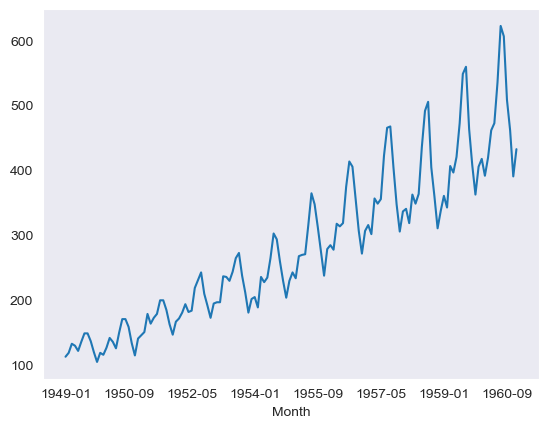

In [85]:
data['#Passengers'].plot()

From the previous plot it obvious that there are trend and seasonality

NOW let's try some technique to transform this data from non-stationary to stationary

We can check using DECOMPOSITION

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=data["#Passengers"], model='mul', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

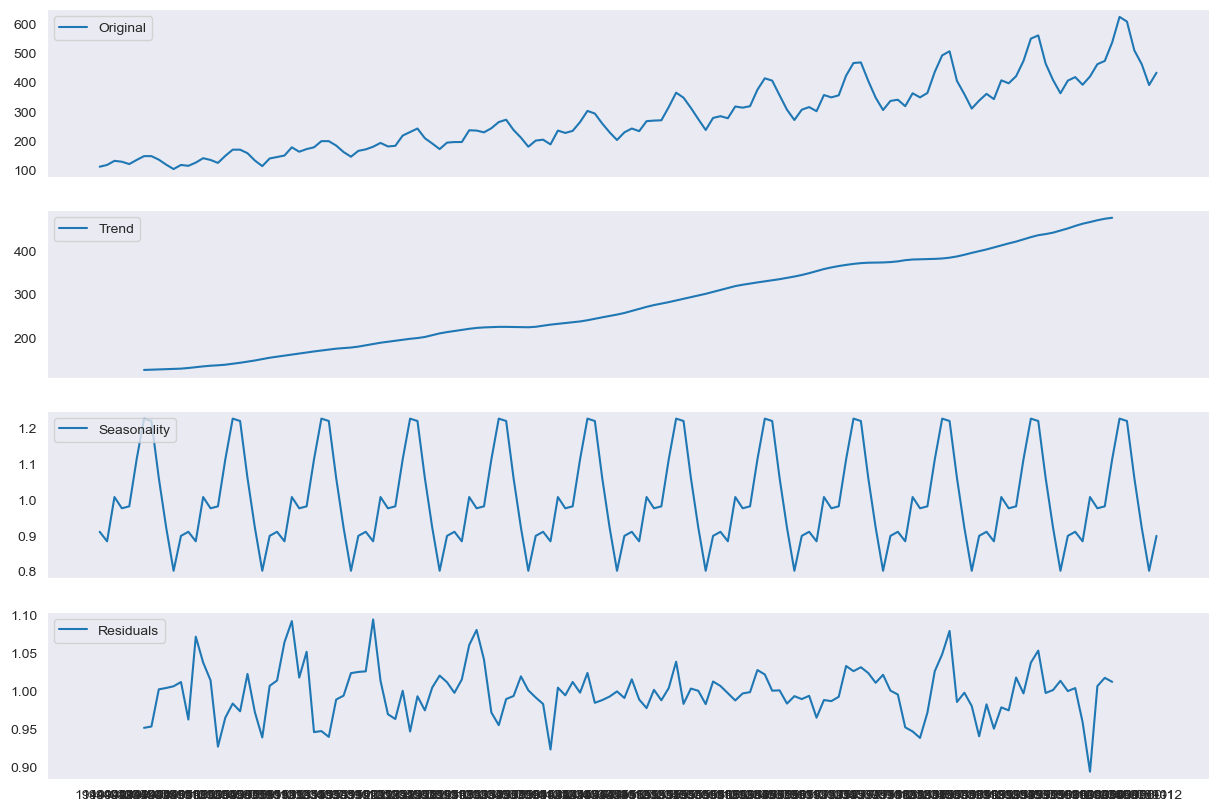

In [87]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(data["#Passengers"], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

### 1: single exp

Single Exponential Smoothing (SES)
This method works with just **stationary** time series. If we want to use this method, the time series shouldn’t have trend and seasonality.

This method:
- Can handle level
- Forecasts by exponentially correcting
- Give weights to previous values based on “the future is more related with the past”
- Forecasts by previous act values and previous forecasted values (giving weights exponentially)

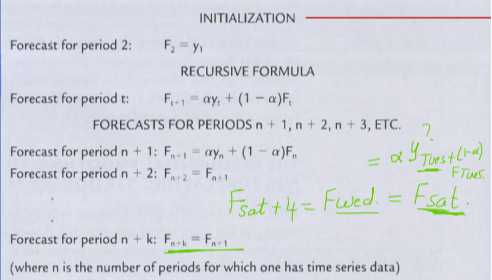


- F t+1 : the time unit to be forecasted
- y t: the previous act value (learning, the method learns from this value)
- F t: the previous forecasted value (remember, the method remember from this value)
- alpha : smoothing factor. It is between 0 and 1
So, the method uses the previous act value and previous forecasted value to forecast the next value.

!!NOTE : if alpha near to one for example 0.99 that means we care about the current actual value(y_t) than the histort 


In [88]:
from statsmodels.tsa.api import SimpleExpSmoothing
import statsmodels.api as sm
# Define training and testing windows
train_window = 24  # Number of past periods to use for training
test_window = 1   # Number of future periods to use for testing

# Define lists to store actual and predicted values
y_true = []
y_pred = []

# Loop over the data and use rolling evaluation
for i in range(train_window, len(data)-test_window+1):
    # Split data into training and testing sets
    train_data = data.iloc[i-train_window:i]
    test_data = data.iloc[i:i+test_window]
    
    # Fit SES model to training data
    model = sm.tsa.SimpleExpSmoothing(train_data).fit(optimized=True)
    
    # Make predictions for testing data
    predictions = model.forecast(test_window)
    
    # Append actual and predicted values to lists
    y_true.append(test_data.values)
    y_pred.append(predictions)
    


In [94]:
evaluate(np.concatenate(y_true).reshape(len(y_true)), np.concatenate(y_pred))

MAE: 28.428850899589907
RMSE: 36.267756541540834
MAPE: 8.936986808947891


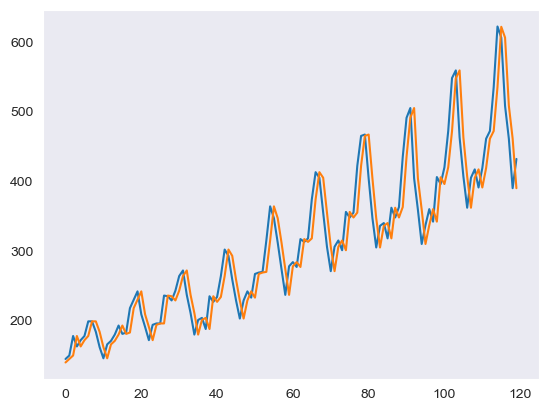

In [90]:
plt.plot(np.concatenate(y_true))
plt.plot(np.concatenate(y_pred))

In [91]:
ts_data = data["#Passengers"]
train = ts_data [:133]
test =  ts_data[133:]

In [92]:
## optimize the smoothing value 
single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))

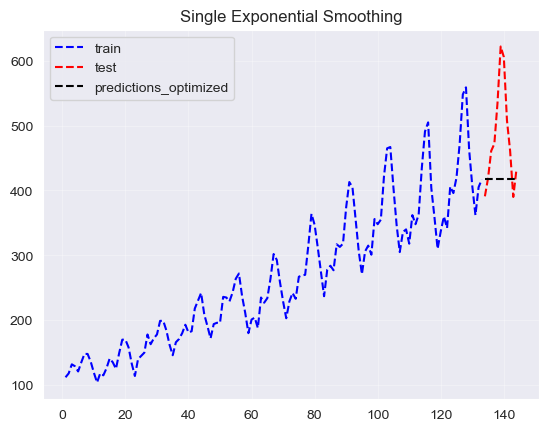

In [93]:
data = pd.read_csv("AirPassengers.csv")
time = np.arange(1 , len(data["Month"])+1)
plt.plot(time[:-11], train, 'b--', label="train")
plt.plot(time[-11:], test, 'r--', label="test")
plt.plot(time[-11:], single_preds, "k--", label="predictions_optimized")

plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

In [95]:
evaluate(test.values,single_preds.values)

MAE: 74.2206804889001
RMSE: 99.34730608347529
MAPE: 13.859972665932776


From the previous plot it obvious that there are trend and seasonality and not stable for long term forcasting